In [32]:
# Import all the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
import seaborn as sns
import matplotlib.patches as mpatches
import visuals as vs
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import fbeta_score
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import time
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.feature_selection import RFE
from scipy import stats
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics

In [41]:
# Load the data set
df = pd.read_csv("churn_data.csv")

# Disaplay first 5 rows of data set
display(df.head(n=5))

# Display summary of data
df.describe()

,Customer_ID,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,...,ownrent,lor,marital,adults,infobase,income,numbcars,creditcd,eqpdays,churn
0,1000001,23.9975,219.25,22.500,0.2475,0.00,0.0,0.0,0.0,0.0,...,O,15.0,S,1.0,M,4.0,3.0,Y,361.0,1
1,1000002,57.4925,482.75,37.425,0.2475,22.75,9.1,9.1,0.0,0.0,...,NaN,1.0,S,1.0,M,5.0,1.0,Y,240.0,0
2,1000003,16.9900,10.25,16.990,0.0000,0.00,0.0,0.0,0.0,0.0,...,O,7.0,M,2.0,M,5.0,2.0,Y,1504.0,1
3,1000004,38.0000,7.50,38.000,0.0000,0.00,0.0,0.0,0.0,0.0,...,NaN,6.0,M,4.0,M,6.0,1.0,Y,1812.0,0
4,1000005,55.2300,570.50,71.980,0.0000,0.00,0.0,0.0,0.0,0.0,...,R,5.0,S,1.0,M,6.0,1.0,Y,434.0,0


,Customer_ID,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,...,phones,models,truck,rv,lor,adults,income,numbcars,eqpdays,churn
count,1.000000e+05,99643.000000,99643.000000,99643.000000,99643.000000,99643.000000,99643.000000,99643.000000,99643.000000,99643.000000,...,99999.000000,99999.000000,98268.000000,98268.000000,69810.000000,76981.000000,74564.000000,50634.000000,99999.000000,100000.000000
mean,1.050000e+06,58.719985,513.559937,46.179136,0.888828,41.072247,13.559560,13.295062,0.261318,1.286405,...,1.787118,1.545825,0.188820,0.082580,6.177238,2.530326,5.783112,1.567563,391.932309,0.495620
std,2.886766e+04,46.291677,525.168140,23.623489,2.177619,97.296150,30.500885,30.056089,3.126531,14.711374,...,1.313977,0.898395,0.391368,0.275248,4.735267,1.452819,2.182132,0.625456,256.482193,0.499983
min,1.000001e+06,-6.167500,0.000000,-26.915000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,-5.000000,0.000000
25%,1.025001e+06,33.260000,150.750000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,2.000000,1.000000,4.000000,1.000000,212.000000,0.000000
50%,1.050000e+06,48.195000,355.500000,44.990000,0.247500,2.750000,1.000000,0.682500,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,5.000000,2.000000,6.000000,1.000000,342.000000,0.000000
75%,1.075000e+06,70.750000,703.000000,59.990000,0.990000,42.000000,14.437500,14.025000,0.000000,0.235000,...,2.000000,2.000000,0.000000,0.000000,9.000000,3.000000,7.000000,2.000000,530.000000,1.000000
max,1.100000e+06,3843.262500,12206.750000,409.990000,159.390000,4320.750000,1102.400000,896.087500,423.540000,3685.200000,...,28.000000,16.000000,1.000000,1.000000,15.000000,6.000000,9.000000,3.000000,1823.000000,1.000000


In [42]:
df.shape

(100000, 90)

In [43]:
df.dtypes.value_counts()

float64    68
object     12
int64      10
dtype: int64

In [44]:
# find missing values ratio in each column
pct_null = df.isnull().sum()/len(df)

# feature where missing values is >30%
missing_features = pct_null[pct_null>0.3].index
print(missing_features)

# Delete these features with high missing values
df.drop(missing_features, axis=1, inplace=True)



Index(['ownrent', 'lor', 'numbcars'], dtype='object')


In [45]:
# List all the non numeric fields

categorical_variables = df.columns[df.dtypes == "object"]
print(categorical_variables)
categorical_variables.shape

Index(['new_cell', 'crclscod', 'asl_flag', 'prizm_social_one', 'area',
       'dualband', 'refurb_new', 'hnd_webcap', 'marital', 'infobase',
       'creditcd'],
      dtype='object')


(11,)

In [46]:
# List all the numeric fields
continous_variables = df.columns[df.dtypes != "object"]
print(continous_variables)
continous_variables.shape

Index(['Customer_ID', 'rev_Mean', 'mou_Mean', 'totmrc_Mean', 'da_Mean',
       'ovrmou_Mean', 'ovrrev_Mean', 'vceovr_Mean', 'datovr_Mean', 'roam_Mean',
       'change_mou', 'change_rev', 'drop_vce_Mean', 'drop_dat_Mean',
       'blck_vce_Mean', 'blck_dat_Mean', 'unan_vce_Mean', 'unan_dat_Mean',
       'plcd_vce_Mean', 'plcd_dat_Mean', 'recv_vce_Mean', 'recv_sms_Mean',
       'comp_vce_Mean', 'comp_dat_Mean', 'custcare_Mean', 'ccrndmou_Mean',
       'cc_mou_Mean', 'inonemin_Mean', 'threeway_Mean', 'mou_cvce_Mean',
       'mou_cdat_Mean', 'mou_rvce_Mean', 'owylis_vce_Mean', 'mouowylisv_Mean',
       'iwylis_vce_Mean', 'mouiwylisv_Mean', 'peak_vce_Mean', 'peak_dat_Mean',
       'mou_peav_Mean', 'mou_pead_Mean', 'opk_vce_Mean', 'opk_dat_Mean',
       'mou_opkv_Mean', 'mou_opkd_Mean', 'drop_blk_Mean', 'attempt_Mean',
       'complete_Mean', 'callfwdv_Mean', 'callwait_Mean', 'months', 'uniqsubs',
       'actvsubs', 'totcalls', 'totmou', 'totrev', 'adjrev', 'adjmou',
       'adjqty', 'avgrev'

(76,)

In [47]:
#count of missisng values in each column
df[df.columns].isnull().sum().sort_values(ascending=False)[:35]

income              25436
adults              23019
infobase            22079
hnd_webcap          10189
prizm_social_one     7388
avg6mou              2839
avg6qty              2839
avg6rev              2839
creditcd             1732
marital              1732
rv                   1732
truck                1732
change_mou            891
change_rev            891
hnd_price             847
ovrmou_Mean           357
vceovr_Mean           357
ovrrev_Mean           357
datovr_Mean           357
roam_Mean             357
totmrc_Mean           357
da_Mean               357
rev_Mean              357
mou_Mean              357
area                   40
eqpdays                 1
dualband                1
refurb_new              1
phones                  1
models                  1
inonemin_Mean           0
custcare_Mean           0
ccrndmou_Mean           0
cc_mou_Mean             0
mou_cdat_Mean           0
dtype: int64

In [48]:
# There are 357 rows with no data from colB to AW. 
print("No of rows missing data from col B to AW: {}".format(df['rev_Mean'].isnull().sum()))
print("Current shape of the dataframe: {}".format(df.shape))


No of rows missing data from col B to AW: 357
Current shape of the dataframe: (100000, 87)


In [49]:
# Delete 357 which are missing data from col B to col AW from the dataframe
df = df.dropna(axis=0, how = 'any', subset=['rev_Mean'])

# Print modified shape of dataframe
print("Current shape of the dataframe: {}".format(df.shape))

Current shape of the dataframe: (99643, 87)


In [50]:
# Check for NA in continous variables
df[categorical_variables].isnull().sum().sort_values(ascending=False)

infobase            21984
hnd_webcap          10111
prizm_social_one     7373
creditcd             1723
marital              1723
area                   40
refurb_new              1
dualband                1
asl_flag                0
crclscod                0
new_cell                0
dtype: int64

In [51]:
# There are missign data in categorical variables. Make missing data as one of the category 
#in each of these categorical variables

df[categorical_variables] = df[categorical_variables].fillna('MD')

In [52]:
#Verify if missing data has become a seperate category

print(df['infobase'].value_counts())
print(df['hnd_webcap'].value_counts())
print(df['creditcd'].value_counts())

M     77435
MD    21984
N       224
Name: infobase, dtype: int64
WCMB    75570
WC      13727
MD      10111
UNKW      235
Name: hnd_webcap, dtype: int64
Y     67015
N     30905
MD     1723
Name: creditcd, dtype: int64


In [53]:
# Verify there are no more NA's in categorical variables

df[categorical_variables].isnull().sum().sort_values(ascending=False)

creditcd            0
infobase            0
marital             0
hnd_webcap          0
refurb_new          0
dualband            0
area                0
prizm_social_one    0
asl_flag            0
crclscod            0
new_cell            0
dtype: int64

In [54]:
# Check for NA in continous variables
continous_null = df[continous_variables].isnull().sum(axis=0).sort_values(ascending=False)
continous_null[0:15,]

income           25330
adults           22921
avg6rev           2787
avg6qty           2787
avg6mou           2787
rv                1723
truck             1723
hnd_price          846
change_rev         534
change_mou         534
phones               1
eqpdays              1
models               1
comp_dat_Mean        0
plcd_vce_Mean        0
dtype: int64

In [55]:
# Delete rows from columns where number of missing values are less than 2787
df = df.dropna(axis=0, how = 'any', subset=['avg6rev','avg6qty','avg6mou','truck','hnd_price','change_rev','change_mou',
                                            'phones','models','eqpdays'])

# Print modified shape of dataframe
print("Current shape of the dataframe: {}".format(df.shape))

Current shape of the dataframe: (93931, 87)


In [56]:
# Check for NA in continous variables after row deletions
continous_null = df[continous_variables].isnull().sum(axis=0).sort_values(ascending=False)
continous_null[0:5,]

income           22345
adults           20056
churn                0
inonemin_Mean        0
recv_vce_Mean        0
dtype: int64

<font size=5>Imputing Missing Values</font>

We cannot have missing values in a dataset, rows/columns which cannot be deleted which includes missing values, imputation needs to be done. In this we use iterative imputer which estimates each feature mising values from all the other features.

class sklearn.impute.IterativeImputer(estimator=None, missing_values=nan, sample_posterior=False, max_iter=10, tol=0.001, n_nearest_features=None, initial_strategy='mean', imputation_order='ascending', skip_complete=False, min_value=None, max_value=None, verbose=0, random_state=None, add_indicator=False)

Multivariate imputer that estimates each feature from all the others.

A strategy for imputing missing values by modeling each feature with missing values as a function of other features in a round-robin fashion.

Reference: https://scikitlearn.org/stable/modules/generated/sklearn.impute.IterativeImputer.html#sklearn.impute.IterativeImputer

In [57]:
# Use sklearn iterative imputer to impute missing values in income and adults columns
numeric_cols = df.select_dtypes(include=[np.number])
non_numeric_cols = df.select_dtypes(include=[np.object])
imp = IterativeImputer(RandomForestRegressor(),initial_strategy='median',max_iter=10,random_state=0, min_value =1, max_value=9)
imp_iter = imp.fit_transform(numeric_cols)

C:\Users\Ravi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ravi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [58]:
# Verify if the numeric cols have any null values
imputed_data_numeric = pd.DataFrame(imp_iter, columns=numeric_cols.columns)
imputed_data_numeric.isnull().sum().sort_values(ascending=False)

churn            0
inonemin_Mean    0
recv_vce_Mean    0
recv_sms_Mean    0
comp_vce_Mean    0
                ..
actvsubs         0
totcalls         0
totmou           0
totrev           0
Customer_ID      0
Length: 76, dtype: int64

In [59]:
# Adults and Income feature are int values, but the imputer generate float values. So convert to int values.
imputed_data_numeric['income']=imputed_data_numeric['income'].astype('int')
imputed_data_numeric['adults']=imputed_data_numeric['adults'].astype('int')

In [60]:
# Check if the dtype of adults and income are int
print(imputed_data_numeric['adults'].dtypes)
print(imputed_data_numeric['income'].dtypes)

int32
int32


In [61]:
# Reset the index values to the second dataframe appends properly
# drop=True option avoids adding new index column with old index values
non_numeric_cols = non_numeric_cols.reset_index(drop=True)
new_df = pd.concat([imputed_data_numeric, non_numeric_cols],axis=1)

In [62]:
# There are 2 columns with negatuve values, since log tranformation cannot be applied to negative values, 
#we will add Maximum negative value in the whole column (Value + Maximum Negative value + 1)
#In this way the minimum value of the data would be 1

new_df['change_mou']= new_df['change_mou'].apply(lambda x: x+abs(new_df['change_mou'].min())+1)
new_df['change_rev']= new_df['change_rev'].apply(lambda x: x+abs(new_df['change_rev'].min())+1)

In [63]:
new_df.shape

(93931, 87)

In [64]:
# Remove outliers.
#For each column, first it computes the Z-score of each value in the column, relative to the column mean and standard deviation.
#Then is takes the absolute of Z-score because the direction does not matter, only if it is below the threshold.
#all(axis=1) ensures that for each row, all column satisfy the constraint.
#Finally, result of this condition is used to index the dataframe

new_df= new_df[(np.abs(stats.zscore(new_df[numeric_cols.columns])) < 3).all(axis=1)]
new_df.shape

(67719, 87)

In [65]:
# check for any other features for negative values
new_df_numeric = new_df.columns[new_df.dtypes != "object"]
new_df[new_df[new_df_numeric]<0].count().sort_values(ascending=False)

eqpdays          39
totmrc_Mean      13
avg6rev           3
rev_Mean          1
mou_rvce_Mean     0
                 ..
adjqty            0
avgrev            0
avgmou            0
avgqty            0
Customer_ID       0
Length: 87, dtype: int64

In [66]:
# There are some negative fields in other columns which do not make sense. So lets remove those rows since they are not many.
#for ex number of days of current equipment (epqdays) cannot be negative. We will replace these negative values with np.nan
# and use dropna to delete these rows.

new_df[new_df[new_df_numeric]<0] = np.nan
new_df = new_df.dropna(axis=0, how = 'any')
new_df.shape

(67664, 87)

Create any additional features from existing data which might be useful for analysis. In this case just looking at raw number of drops, blocks and completions will not give a good idea of user expereince. Looking at the drop rate, block and completion rate gives better idea of user expereince.

In [67]:
# First setp is to make the new feature all 0, after that claculate rate of all rows where denominatior >0. 
#This avoid any div by 0 error

new_df['vce_blk_rate'] = 0
new_df.loc[new_df['plcd_vce_Mean'] > 0, 'vce_blk_rate'] = new_df['blck_vce_Mean'] / new_df['plcd_vce_Mean']

new_df['vce_drp_rate'] = 0
new_df.loc[new_df['plcd_vce_Mean'] > 0, 'vce_drp_rate'] = new_df['drop_vce_Mean'] / new_df['plcd_vce_Mean']

new_df['dat_blk_rate'] = 0
new_df.loc[new_df['plcd_dat_Mean'] > 0, 'dat_blk_rate'] = new_df['blck_dat_Mean'] / new_df['plcd_dat_Mean']

new_df['dat_drp_rate'] = 0
new_df.loc[ new_df['plcd_dat_Mean'] > 0, 'dat_drp_rate'] = new_df['drop_dat_Mean'] / new_df['plcd_dat_Mean']

new_df['vce_cmpt_rate'] = 0
new_df.loc[new_df['plcd_vce_Mean'] > 0, 'vce_cmpt_rate'] = new_df['comp_vce_Mean'] / new_df['plcd_vce_Mean']

new_df['dat_cmpt_rate'] = 0
new_df.loc[new_df['plcd_dat_Mean'] > 0, 'dat_cmpt_rate'] = new_df['comp_dat_Mean'] / new_df['plcd_dat_Mean']

In [68]:
print("New dataframe shape:{}".format(new_df.shape))

New dataframe shape:(67664, 93)


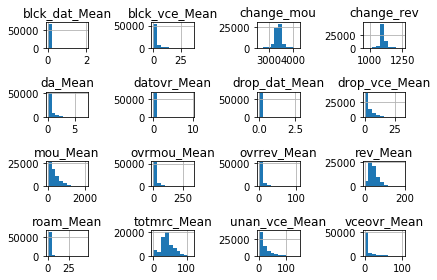

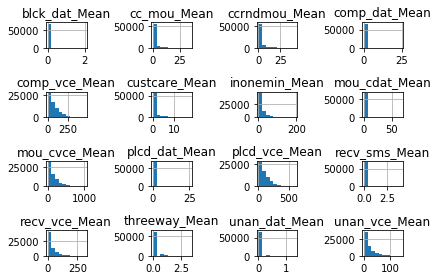

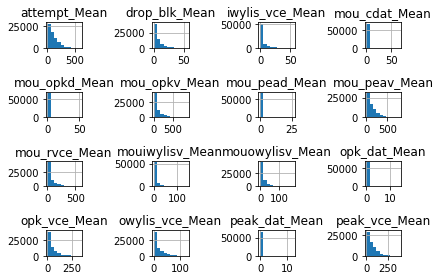

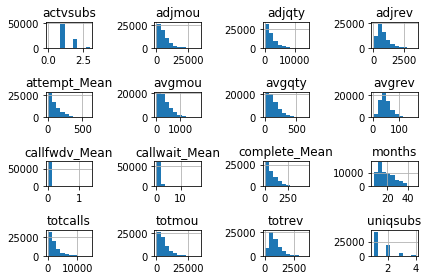

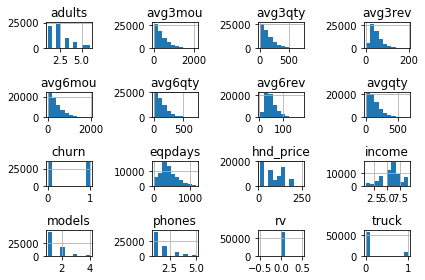

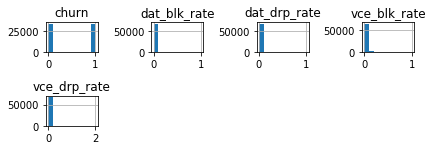

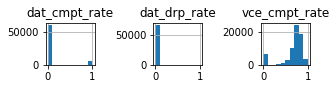

In [69]:
# look at the distibution of all columns

num=[1,15,30,45,60,75,90]

for i in num:
    new_df.iloc[:,i:i+16].hist(layout = (4,4), xlabelsize=10, ylabelsize=10)
    pl.tight_layout()


<font size="5">Transforming Skewed Continuous Features</font>

A dataset may sometimes contain at least one feature whose values tend to lie near a single number, but will also have a non-trivial number of vastly larger or smaller values than that single number. Algorithms can be sensitive to such distributions of values and can underperform if the range is not properly normalized.

For highly-skewed feature distributions, it is common practice to apply a logarithmic transformation on the data so that the very large and very small values do not negatively affect the performance of a learning algorithm. Using a logarithmic transformation significantly reduces the range of values caused by outliers. Care must be taken when applying this transformation however: The logarithm of 0 is undefined, so we must translate the values by a small amount above 0 to apply the the logarithm successfully.

In this case from above plots looks like most of the columns need log transformation, so lets apply log on all the columns

In [70]:
# Drop customer id since its not a feature but a mere id for each customer
new_df = new_df.drop('Customer_ID', axis=1)

In [71]:
# Split the data into features and target label(churn)

churn_raw = new_df['churn']
features_raw = new_df.drop('churn', axis = 1)

In [72]:
# verify the shape of feature and target labels
print("Target Label-Churn shape:{}".format(churn_raw.shape))
print("Features shape:{}".format(features_raw.shape))

Target Label-Churn shape:(67664,)
Features shape:(67664, 91)


In [73]:
# Log-transform the skewed features
skewed = features_raw.columns[features_raw.dtypes != "object"]
features_log_transformed = pd.DataFrame(data = features_raw)
features_log_transformed[skewed] = features_raw[skewed].apply(lambda x: np.log(x + 1))

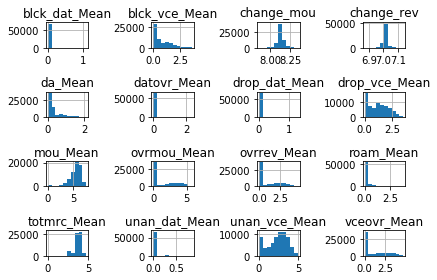

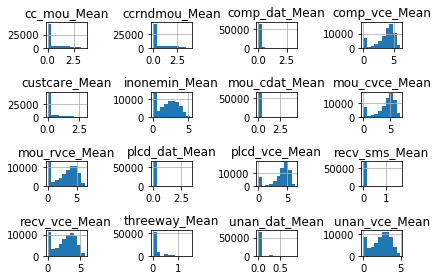

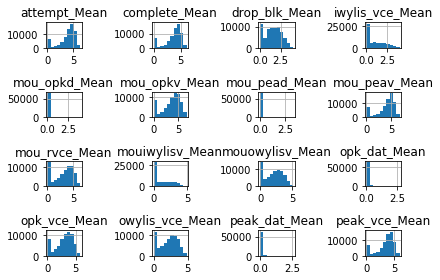

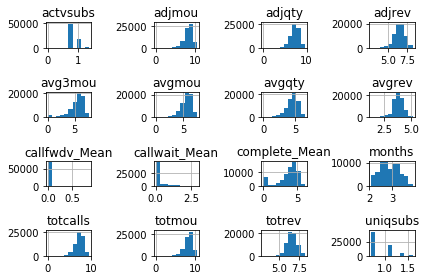

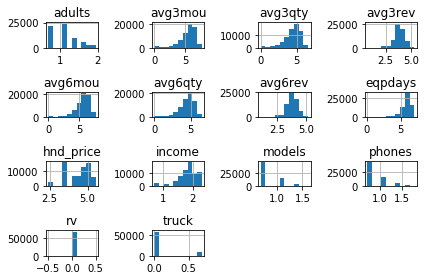

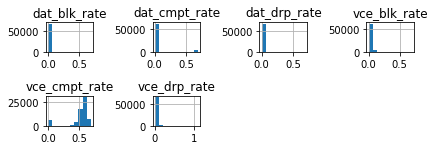

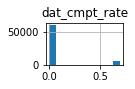

In [74]:
num=[1,15,30,45,60,75,90]

for i in num:
    features_log_transformed.iloc[:,i:i+16].hist(layout = (4,4), xlabelsize=10, ylabelsize=10)
    pl.tight_layout()

<font size="5">Normalizing Numerical Features</font>

In addition to performing transformations on features that are highly skewed, it is often good practice to perform some type of scaling on numerical features. Applying a scaling to the data does not change the shape of each feature's distribution. however, normalization ensures that each feature is treated equally when applying supervised learners. Note that once scaling is applied, observing the data in its raw form will no longer have the same original meaning

We will use sklearn.preprocessing.MinMaxScaler for this. 

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html

In [75]:
# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)
numerical = features_raw.columns[features_raw.dtypes != "object"]

features_log_minmax_transform = pd.DataFrame(data = features_log_transformed)
features_log_minmax_transform[numerical] = scaler.fit_transform(features_log_transformed[numerical])

# Show an example of a record with scaling applied
display(features_log_minmax_transform.head(n = 5))

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,...,hnd_webcap,marital,infobase,creditcd,vce_blk_rate,vce_drp_rate,dat_blk_rate,dat_drp_rate,vce_cmpt_rate,dat_cmpt_rate
429,0.794618,0.808917,0.825193,0.000000,0.852226,0.581370,0.582605,0.0,0.00000,0.356989,...,MD,M,M,Y,0.032215,0.005854,0.0,0.0,0.800691,0.0
438,0.783404,0.642468,0.894602,0.191362,0.000000,0.000000,0.000000,0.0,0.00000,0.561797,...,WC,U,MD,N,0.010268,0.031941,0.0,0.0,0.813231,0.0
441,0.810949,0.774814,0.825193,1.000000,0.000000,0.000000,0.000000,0.0,0.40627,0.564640,...,WCMB,U,MD,N,0.007553,0.028227,0.0,0.0,0.904111,0.0
449,0.785209,0.853636,0.844822,0.656122,0.592005,0.298165,0.298798,0.0,0.00000,0.667148,...,WCMB,A,M,N,0.026585,0.010358,0.0,0.0,0.847768,0.0
458,0.751597,0.816925,0.862736,0.327467,0.000000,0.000000,0.000000,0.0,0.00000,0.588281,...,WCMB,M,M,Y,0.061401,0.003761,0.0,0.0,0.740545,0.0


<font size="5">Implementation: Data Preprocessing</font>

From the table in Exploring the Data above, we can see there are several features for each record that are non-numeric. Typically, learning algorithms expect input to be numeric, which requires that non-numeric features (called categorical variables) be converted. One popular way to convert categorical variables is by using the one-hot encoding scheme. One-hot encoding creates a "dummy" variable for each possible category of each non-numeric feature. For example, assume someFeature has three possible entries: A, B, or C. We then encode this feature into someFeature_A, someFeature_B and someFeature_C.

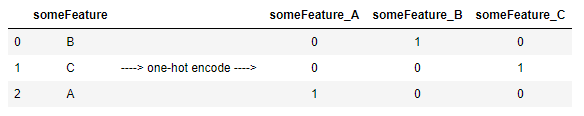


Use pandas.get_dummies() to perform one-hot encoding on the 'features_log_minmax_transform' data. The target label churn is already numeric data, so we do not have to convert the churn to numeric.

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html

In [76]:
# TODO: One-hot encode the 'features_log_minmax_transform' data using pandas.get_dummies()
features_final = pd.get_dummies(features_log_minmax_transform)

# Print the number of features after one-hot encoding
encoded = list(features_final.columns)
print("{} total features after one-hot encoding.".format(len(encoded)))

# To see the encoded feature names
print(encoded)

# check the new size of the data frame
features_final.shape

181 total features after one-hot encoding.
['rev_Mean', 'mou_Mean', 'totmrc_Mean', 'da_Mean', 'ovrmou_Mean', 'ovrrev_Mean', 'vceovr_Mean', 'datovr_Mean', 'roam_Mean', 'change_mou', 'change_rev', 'drop_vce_Mean', 'drop_dat_Mean', 'blck_vce_Mean', 'blck_dat_Mean', 'unan_vce_Mean', 'unan_dat_Mean', 'plcd_vce_Mean', 'plcd_dat_Mean', 'recv_vce_Mean', 'recv_sms_Mean', 'comp_vce_Mean', 'comp_dat_Mean', 'custcare_Mean', 'ccrndmou_Mean', 'cc_mou_Mean', 'inonemin_Mean', 'threeway_Mean', 'mou_cvce_Mean', 'mou_cdat_Mean', 'mou_rvce_Mean', 'owylis_vce_Mean', 'mouowylisv_Mean', 'iwylis_vce_Mean', 'mouiwylisv_Mean', 'peak_vce_Mean', 'peak_dat_Mean', 'mou_peav_Mean', 'mou_pead_Mean', 'opk_vce_Mean', 'opk_dat_Mean', 'mou_opkv_Mean', 'mou_opkd_Mean', 'drop_blk_Mean', 'attempt_Mean', 'complete_Mean', 'callfwdv_Mean', 'callwait_Mean', 'months', 'uniqsubs', 'actvsubs', 'totcalls', 'totmou', 'totrev', 'adjrev', 'adjmou', 'adjqty', 'avgrev', 'avgmou', 'avgqty', 'avg3mou', 'avg3qty', 'avg3rev', 'avg6mou', 'av

(67664, 181)

In [77]:
# Check the first 5 lines of the new transformed dataframe

features_final.head(5)

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,...,marital_A,marital_B,marital_M,marital_S,marital_U,infobase_M,infobase_MD,infobase_N,creditcd_N,creditcd_Y
429,0.794618,0.808917,0.825193,0.000000,0.852226,0.581370,0.582605,0.0,0.00000,0.356989,...,0,0,1,0,0,1,0,0,0,1
438,0.783404,0.642468,0.894602,0.191362,0.000000,0.000000,0.000000,0.0,0.00000,0.561797,...,0,0,0,0,1,0,1,0,1,0
441,0.810949,0.774814,0.825193,1.000000,0.000000,0.000000,0.000000,0.0,0.40627,0.564640,...,0,0,0,0,1,0,1,0,1,0
449,0.785209,0.853636,0.844822,0.656122,0.592005,0.298165,0.298798,0.0,0.00000,0.667148,...,1,0,0,0,0,1,0,0,1,0
458,0.751597,0.816925,0.862736,0.327467,0.000000,0.000000,0.000000,0.0,0.00000,0.588281,...,0,0,1,0,0,1,0,0,0,1


<font size=5>Shuffle and Split Data</font>

Now all categorical variables have been converted into numerical features, and all numerical features have been normalized. As always, we will now split the data (both features and their labels) into training and test sets. 80% of the data will be used for training and 20% for testing.

We will use sklearn.train_test_split() to split the data into training and testing sets

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [78]:
# Churn data type is float, convert to int

churn = churn_raw.astype('int')

# Split the 'features' and 'income' data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(features_final, 
                                                    churn, 
                                                    test_size = 0.2, 
                                                    random_state = 0,
                                                    )

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape))
print("Testing set has {} samples.".format(X_test.shape))

Training set has (54131, 181) samples.
Testing set has (13533, 181) samples.


Count of Data points where churn is 0: 33662
Count of Data points where churn is 1: 34002


(array([33662.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 34002.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

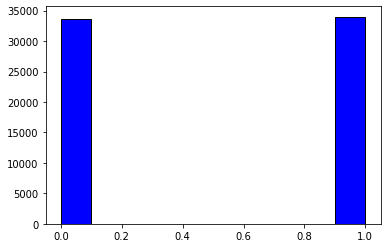

In [79]:
# Histogram of output variable(Churn) to check for any class imbalance
print("Count of Data points where churn is 0: {}".format(churn[churn==0].shape[0]))
print("Count of Data points where churn is 1: {}".format(churn[churn==1].shape[0]))
pl.hist(churn, color = 'blue', edgecolor = 'black')

<font size=5> Feature Selection </font>

Machine learning algorithms learn from differnt features with the data set. The trianing and performace of the model depends on the features. Having redundant features or fetaures which are highly correalted or fetaures whoch have the same value for any output are no help to modelling and will slow down the training and might overfit.
The process of selecting the most suitable features for training the machine learning model is called "feature selection".

There are several advantages of performing feature selection before training machine learning models, some of which have been enlisted below:

1. Models with less number of features have higher explainability
2. It is easier to implement machine learning models with reduced features
3. Fewer features lead to enhanced generalization which in turn reduces overfitting
4. Feature selection removes data redundancy
5. Training time of models with fewer features is significantly lower
6. Models with fewer features are less prone to errors

<font size=3><b> Filter Methods </font></b>

Filter method relies on the general uniqueness of the data to be evaluated and pick feature subset, not including any mining algorithm. Univariate filter methods ranks individual features using some criteria like variance and deletes the top N fetaures. They do not take other fetaures into account and analysis is done at feature level. Where as multivariate features take other features into account so they can delete redundant or coreleated features.
It is important to mention here that, in order to avoid overfitting, feature selection should only be applied to the training set




<font size=3><b> Removing Constant features</font></b>

Constant features are the type of features that contain only one value for all the outputs in the dataset. Constant features provide no information that can help in classification of the record at hand. Therefore, it is advisable to remove all the constant features from the dataset.

To do so we will use VarianceThreshold function. The function requires a value for its threshold parameter. Passing a value of zero for the parameter will filter all the features with zero variance. We can use 
sklearn.feature_selection import VarianceThreshold for this.

Based on below result, none of the features in the dataset are constant. To remove constant features from training and test sets, we can use the transform() method of the constant_filter.

In [80]:
# Remove constant fetaures using variance treshold
constant_filter = VarianceThreshold(threshold=0)
constant_filter.fit(X_train)

#to get all the features that are not constant, we can use the get_support() method of the filter
print(len(X_train.columns[constant_filter.get_support()]))

# drop columns which meet the above criteria

constant_columns = [column for column in X_train.columns
                    if column not in X_train.columns[constant_filter.get_support()]]

X_train.drop(labels=constant_columns, axis=1, inplace=True)
X_test.drop(labels=constant_columns, axis=1, inplace=True)

print("New Training data shape:{}".format(X_train.shape))
print("New Test data shape:{}".format(X_test.shape))

178
New Training data shape:(54131, 178)
New Test data shape:(13533, 178)


C:\Users\Ravi\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


<font size=3><b> Removing Corelated Features </font></b>

Correlation between the output observations and the input features is very important and such features should be retained. However, if two or more than two features are mutually correlated, they convey redundant information to the model and hence only one of the correlated features should be retained to reduce the number of features.

To remove the correlated features, we can make use of the corr() method of the pandas dataframe. The corr() method returns a correlation matrix containing correlation between all the columns of the dataframe. We can then loop through the correlation matrix and see if the correlation between two columns is greater than threshold correlation, add that column to the set of correlated columns. We can remove that set of columns from the actual dataset.

In [81]:
correlated_features = set()
correlation_matrix = X_train.corr()
correlation_matrix

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,...,marital_A,marital_B,marital_M,marital_S,marital_U,infobase_M,infobase_MD,infobase_N,creditcd_N,creditcd_Y
rev_Mean,1.000000,0.581995,0.781353,0.334611,0.490160,0.507907,0.503055,0.110578,0.213016,-0.013163,...,-0.008124,0.031301,-0.104937,0.013888,0.075445,-0.075154,0.074412,0.009507,0.083055,-0.083055
mou_Mean,0.581995,1.000000,0.446165,0.325024,0.458189,0.445775,0.439254,0.109167,0.134270,-0.028336,...,-0.011382,0.027591,-0.115258,0.005326,0.095468,-0.091852,0.090969,0.011378,0.095596,-0.095596
totmrc_Mean,0.781353,0.446165,1.000000,0.189534,0.051378,0.050068,0.045331,0.056666,0.087187,0.001904,...,-0.012838,0.023812,-0.079267,0.012330,0.058482,-0.063291,0.062133,0.013246,0.072652,-0.072652
da_Mean,0.334611,0.325024,0.189534,1.000000,0.248124,0.247777,0.243443,0.077893,0.128703,-0.014629,...,0.009196,0.028219,-0.053270,-0.008574,0.037870,-0.044122,0.043717,0.005276,0.037227,-0.037227
ovrmou_Mean,0.490160,0.458189,0.051378,0.248124,1.000000,0.992565,0.985630,0.162396,0.085404,-0.008819,...,0.002706,0.020474,-0.080749,0.004815,0.060581,-0.052332,0.051742,0.007333,0.056523,-0.056523
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
infobase_M,-0.075154,-0.091852,-0.063291,-0.044122,-0.052332,-0.054699,-0.052494,-0.031779,-0.015194,0.015340,...,0.120080,0.147896,0.346669,0.241129,-0.653483,1.000000,-0.994844,-0.080140,-0.760285,0.760285
infobase_MD,0.074412,0.090969,0.062133,0.043717,0.051742,0.053946,0.051771,0.030697,0.015136,-0.015175,...,-0.119461,-0.147133,-0.344881,-0.239885,0.650114,-0.994844,1.000000,-0.021364,0.756365,-0.756365
infobase_N,0.009507,0.011378,0.013246,0.005276,0.007333,0.009008,0.008651,0.011575,0.001014,-0.002073,...,-0.009623,-0.011852,-0.027782,-0.019324,0.052370,-0.080140,-0.021364,1.000000,0.060929,-0.060929
creditcd_N,0.083055,0.095596,0.072652,0.037227,0.056523,0.058981,0.056672,0.032294,0.021583,-0.013320,...,-0.109233,-0.011414,-0.381505,-0.233845,0.601874,-0.760285,0.756365,0.060929,1.000000,-1.000000


In [82]:
for i in range(len(correlation_matrix .columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

print("No.of features where corelation is >0.8:{}".format(len(correlated_features)))


X_train.drop(labels=correlated_features, axis=1, inplace=True)
X_test.drop(labels=correlated_features, axis=1, inplace=True)

print("New Training data shape:{}".format(X_train.shape))
print("New Test data shape:{}".format(X_test.shape))

No.of features where corelation is >0.8:45
New Training data shape:(54131, 133)
New Test data shape:(13533, 133)


<font size=3><b> Wrapper Methods <font></b>
    
Unlike filter methods wrapper methods need a machine learning algorithm and uses its performance for its evaluation procedure.This method searches for a feature which is best-suited for the machine learning algorithm and aims to improve the mining performance. To evaluate the features, the predictive accuracy used for classification.
Some typical examples of wrapper methods are forward feature selection, backward feature elimination, recursive feature elimination, etc. For this project we will use recursive feature elimination.

<b>Recurrsive Feature elimination:</b> Recursive feature elimination performs a greedy search to find the best performing feature subset. It iteratively creates models and determines the best or the worst performing feature at each iteration. It constructs the subsequent models with the left features until all the features are explored. It then ranks the features based on the order of their elimination. In the worst case, if a dataset contains N number of features RFE will do a greedy search for 2N combinations of features. We will use sklearn RFE for performing this.

https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html#sklearn.feature_selection.RFE

<b>Difference between filter and wrapper methods</b>
Well, it might get confusing at times to differentiate between filter methods and wrapper methods in terms of their functionalities. Let's take a look at what points they differ from each other.

Filter methods do not incorporate a machine learning model in order to determine if a feature is good or bad whereas wrapper methods use a machine learning model and train it the feature to decide if it is essential or not.

Filter methods are much faster compared to wrapper methods as they do not involve training the models. On the other hand, wrapper methods are computationally costly, and in the case of massive datasets, wrapper methods are not the most effective feature selection method to consider.

Filter methods may fail to find the best subset of features in situations when there is not enough data to model the statistical correlation of the features, but wrapper methods can always provide the best subset of features because of their exhaustive nature.

Using features from wrapper methods in your final machine learning model can lead to overfitting as wrapper methods already train machine learning models with the features and it affects the true power of learning. But the features from filter methods will not lead to overfitting in most of the cases



Source : https://www.datacamp.com/community/tutorials/feature-selection-python

In [83]:
model = RandomForestClassifier(random_state=0)

rfe = RFE(model, 15)
fit = rfe.fit(X_train, y_train)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

C:\Users\Ravi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ravi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ravi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ravi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ravi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: Future

C:\Users\Ravi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ravi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ravi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ravi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ravi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: Future

C:\Users\Ravi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ravi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ravi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ravi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ravi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: Future

C:\Users\Ravi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ravi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ravi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ravi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ravi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: Future

Num Features: 15
Selected Features: [ True  True  True False False False False  True  True False False False
 False  True False False False False False  True False False  True False
  True  True  True False False False False False  True  True  True False
 False  True False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False]
Feature Ranking: [  1   1   1   7   3  15   8   1   1   2  72   5  79   1  69  21  75  10
  14   1  85  11   1  13   1   1   1   6  12  32   9   4   1   

In [84]:
sel_features = [i for i, j in zip(X_train, fit.support_) if j==True]
sel_features

['rev_Mean',
 'mou_Mean',
 'totmrc_Mean',
 'change_mou',
 'change_rev',
 'unan_vce_Mean',
 'iwylis_vce_Mean',
 'months',
 'totcalls',
 'totrev',
 'avgrev',
 'eqpdays',
 'vce_blk_rate',
 'vce_drp_rate',
 'vce_cmpt_rate']

In [85]:
X_train = X_train[sel_features]
X_test = X_test[sel_features]
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((54131, 15), (13533, 15), (54131,), (13533,))

<font size =5> Evaluating Model Performance </font>

What metrics to use to evaluate model performance

<b>Accuracy</b> 
Measures how often the classifier makes the correct prediction. It’s the ratio of the number of correct predictions to the total number of predictions (the number of test data points).

Accuracy is a good measure when the target variable classes in the data are nearly balanced.

<b>Precision</b>
Tells us what proportion of messages we classified as spam, actually were spam. It is a ratio of true positives(words classified as spam, and which are actually spam) to all positives(all words classified as spam, irrespective of whether that was the correct classificatio), in other words it is the ratio of

[True Positives/(True Positives + False Positives)]

<b>Recall(sensitivity)</b> 
Tells us what proportion of messages that actually were spam were classified by us as spam. It is a ratio of true positives(words classified as spam, and which are actually spam) to all the words that were actually spam, in other words it is the ratio of

[True Positives/(True Positives + False Negatives)]

For classification problems that are skewed in their classification distributions, for example if we had a 100 text messages and only 2 were spam and the rest 98 weren't, accuracy by itself is not a very good metric. We could classify 90 messages as not spam(including the 2 that were spam but we classify them as not spam, hence they would be false negatives) and 10 as spam(all 10 false positives) and still get a reasonably good accuracy score. For such cases, precision and recall come in very handy. These two metrics can be combined to get the F1 score, which is weighted average(harmonic mean) of the precision and recall scores. This score can range from 0 to 1, with 1 being the best possible F1 score(we take the harmonic mean as we are dealing with ratios).

<b>F-beta score</b> as a metric that considers both precision and recall:

<b>F(beta)=(1+(beta)^2)*(precision*recall)/((beta)^2*precision)+recall)</b>

when  beta=0.5 , more emphasis is placed on precision.
when  beta=2, more emphasis on recall, here we are choosing 2 becuase going higer will allow more FP, we dont want too many customers who are not churning showing as churn, since it will take too many customer care calls to people who are not churning and we dont want to disturb these cutomers.

In the case of this data set, the target variable is nearly balanced, so accuracy can be a good metric to evaluate model performance.

Also this is a <b>high recall model</b>, meaning we are OK with some FP (meaning customers who are not churn but predicted as churn) but NOK with any FN (meaning customer who are churn but model classifies as not churn). If we miss cutomers who are churning then we cant reach out to customers to make them happy and probably they will churn, but its ok when customer is not churning but still labelled as churn since no harm happens due that.

Since ours is high recall model meaning more importance to recall the beta in Fbeta lets assign as 2. Beta of 1 mean equal importance is give to both precision and recall. If beta is less than 1 lest say 0.5 then more importance is given to precision and beta is >1 lets say 2 then more importance is goven to recall.

<font size =5> Supervised Learning Methods - Classification </font>

<b>Supervised Learning:</b> We take a set of input features and predict an output. In our case the input features will be specific customer data and output is whether the customer churned or not.

<b>Classification:</b> Classification is a supervised learning technique in which the computer programs learns from the input data and uses this learning to classify new observations. In our case we are using customer data to classify whether that particular customer will churn or not.

<b>Binary Classification:</b> The goal of binary classification is to categories the data into one of the two buckets. In our case its 1-Churn & 0-Not Churn


<font size=5> Implementation - Creating a Training and Predicting Pipeline </font>

To properly evaluate the performance of each model we've chosen, it's important that we create a training and predicting pipeline that allows us to quickly and effectively train models using various sizes of training data and perform predictions on the testing data. Our implementation here will do the following:

Import fbeta_score and accuracy_score from sklearn.metrics.
Fit the learner to the sampled training data and record the training time.
Perform predictions on the test data X_test, and also on the first 300 training points X_train[:300].
Record the total prediction time.
Calculate the accuracy score for both the training subset and testing set.
Calculate the F-score for both the training subset and testing set.
Make sure that we set the beta parameter!

<font size=5> Naive Predictor Performace </font>

If we chose a model that always predicted a customer would churn, what would that model's accuracy and F-score be on this dataset? 

Please note that the purpose of generating a naive predictor is simply to show what a base model without any intelligence would look like. In the real world, ideally your base model would be either the results of a previous model or could be based on a research paper upon which you are looking to improve. When there is no benchmark model set, getting a result better than random choice is a place you could start from.

When we have a model that always predicts '1' (i.e. the individual will churn) then our model will have no True Negatives(TN) or False Negatives(FN) as we are not making any negative('0' value) predictions. Therefore our Accuracy in this case becomes the same as our Precision(True Positives/(True Positives + False Positives)) as every prediction that we have made with value '1' that should have '0' becomes a False Positive; therefore our denominator in this case is the total number of records we have in total.
Our Recall score(True Positives/(True Positives + False Negatives)) in this setting becomes 1 as we have no False Negatives.

In [87]:
'''
TP = np.sum(churn) # Counting the ones as this is the naive case. 
FP = (income.count() - TP) # Specific to the naive case

TN = 0 # No predicted negatives in the naive case
FN = 0 # No predicted negatives in the naive case
'''
# TODO: Calculate accuracy, precision and recall
accuracy = np.sum(churn)/(np.sum(churn)+(churn.count()-np.sum(churn)))
recall = np.sum(churn)/(np.sum(churn)+0)
precision = np.sum(churn)/(np.sum(churn)+(churn.count()-np.sum(churn)))


# TODO: Calculate F-score using the formula above for beta = 2 and correct values for precision and recall.
beta=1
fscore =(1+(beta)**2) * (precision*recall)/(((beta)**2*precision)+recall)

# Print the results 
print("Accuracy Score: {:.4f}".format(accuracy))
print("Recall Score: {:.4f}".format(recall))
print("Precision Score: {:.4f}".format(precision))
print("Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore))

Accuracy Score: 0.5025
Recall Score: 1.0000
Precision Score: 0.5025
Naive Predictor: [Accuracy score: 0.5025, F-score: 0.6689]


In [235]:
def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    # TODO: Fit the learner to the training data using slicing with 'sample_size' using .fit(training_features[:], training_labels[:])
    start = time.time() # Get start time
    learner = learner.fit(X_train[:sample_size], y_train[:sample_size])
    end = time.time() # Get end time
    
    # TODO: Calculate the training time
    results['train_time'] = end-start
        
    # TODO: Get the predictions on the test set(X_test),
    #       then get predictions on the first 300 training samples(X_train) using .predict()
    start = time.time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train)
    end = time.time() # Get end time
    
    # TODO: Calculate the total prediction time
    results['pred_time'] = end-start
            
    # TODO: Compute accuracy on the first 300 training samples which is y_train[:300]
    results['acc_train'] = accuracy_score(y_train, predictions_train)
        
    # TODO: Compute accuracy on test set using accuracy_score()
    results['acc_test'] = accuracy_score(y_test, predictions_test)
    
    # TODO: Compute F-score on the the first 300 training samples using fbeta_score()
    results['f_train'] = fbeta_score(y_train,predictions_train, beta=2)
        
    # TODO: Compute F-score on the test set which is y_test
    results['f_test'] = fbeta_score(y_test, predictions_test, beta=2)
       
    # Success
    print("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
        
    # Return the results
    return results

<font size=5> Implementation: Initial Model Evaluation </font>

In the code cell, we will implement the following:

Import the four supervised learning models appropiate for this problem
Initialize the four models and store them in 'clf_A', 'clf_B','clf_C','clf_D' and 'clf_D' .

Note: We will use the default settings for each model — we will tune one specific model during model optimization.
Calculate the number of records equal to 1%, 10%, and 100% of the training data.
Store those values in 'samples_1', 'samples_10', and 'samples_100' respectively.

We will use the below 5 models 

<font size=3> <b>1. Logistic Regression </font> </b>

Logistic Regression is one of the most simple and commonly used Machine Learning algorithms for two-class classification. It is easy to implement and can be used as the baseline for any binary classification problem. 
Logistic regression is a statistical method for predicting binary classes. The outcome or target variable is dichotomous in nature. Dichotomous means there are only two possible classes. For example, it can be used for cancer detection problems. It computes the probability of an event occurrence.

It is a special case of linear regression where the target variable is categorical in nature. It uses a log of odds as the dependent variable. Logistic Regression predicts the probability of occurrence of a binary event utilizing a logit function.

Because of its efficient and straightforward nature, doesn't require high computation power, easy to implement, easily interpretable, used widely by data analyst and scientist. Also, it doesn't require scaling of features. Logistic regression provides a probability score for observations.

Logistic regression is not able to handle a large number of categorical features/variables. It is vulnerable to overfitting. Also, can't solve the non-linear problem with the logistic regression that is why it requires a transformation of non-linear features. Logistic regression will not perform well with independent variables that are not correlated to the target variable and are very similar or correlated to each other.


<font size=3><b>2. SVM </font></b>

SVM offers very high accuracy compared to other classifiers such as logistic regression, and decision trees. It is known for its kernel trick to handle nonlinear input spaces. It is used in a variety of applications such as face detection, intrusion detection, classification of emails, news articles and web pages, classification of genes, and handwriting recognition.
SVM is an exciting algorithm and the concepts are relatively simple. The classifier separates data points using a hyperplane with the largest amount of margin. That's why an SVM classifier is also known as a discriminative classifier. SVM finds an optimal hyperplane which helps in classifying new data points.

SVM constructs a hyperplane in multidimensional space to separate different classes. SVM generates optimal hyperplane in an iterative manner, which is used to minimize an error. The core idea of SVM is to find a maximum marginal hyperplane (MMH) that best divides the dataset into classes. A hyperplane is a decision plane which separates between a set of objects having different class memberships. A margin is a gap between the two lines on the closest class points. This is calculated as the perpendicular distance from the line to support vectors or closest points. If the margin is larger in between the classes, then it is considered a good margin, a smaller margin is a bad margin.

Support vectors are the data points, which are closest to the hyperplane. These points will define the separating line better by calculating margins. These points are more relevant to the construction of the classifier.

SVM Classifiers offer good accuracy and perform faster prediction compared to Naïve Bayes algorithm. They also use less memory because they use a subset of training points in the decision phase. SVM works well with a clear margin of separation and with high dimensional space. 

SVM is not suitable for large datasets because of its high training time and it also takes more time in training compared to Naïve Bayes. It works poorly with overlapping classes and is also sensitive to the type of kernel used.


SVM best serves the purpose of sepearting 2 classes, since our traget variable has only 2 classes this would be good model to try.

<font size=4><b> Ensemble Methods </font></b>

<font size=3><b> 3. Random Forest </font></b>
Random Forests technically is an ensemble method (based on the divide-and-conquer approach) of decision trees generated on a randomly split dataset. This collection of decision tree classifiers is also known as the forest. The individual decision trees are generated using an attribute selection indicator such as information gain, gain ratio, and Gini index for each attribute. Each tree depends on an independent random sample. In a classification problem, each tree votes and the most popular class is chosen as the final result.

It works in four steps:
•	Select random samples from a given dataset.
•	Construct a decision tree for each sample and get a prediction result from each decision tree.
•	Perform a vote for each predicted result.
•	Select the prediction result with the most votes as the final prediction.

Random forests is considered as a highly accurate and robust method because of the number of decision trees participating in the process. It does not suffer from the overfitting problem. The main reason is that it takes the average of all the predictions, which cancels out the biases. The algorithm can be used in both classification and regression problems. Random forests can also handle missing values. There are two ways to handle these: using median values to replace continuous variables, and computing the proximity-weighted average of missing values. You can get the relative feature importance, which helps in selecting the most contributing features for the classifier.

Random forests is slow in generating predictions because it has multiple decision trees. Whenever it makes a prediction, all the trees in the forest have to make a prediction for the same given input and then perform voting on it. This whole process is time-consuming. The model is difficult to interpret compared to a decision tree, where you can easily make a decision by following the path in the tree.


<font size=3><b> 4. Adaboost </font> </b>
 
Ada-boost or Adaptive Boosting is one of ensemble boosting classifier proposed by Yoav Freund and Robert Schapiro in 1996. It combines multiple classifiers to increase the accuracy of classifiers. AdaBoost is an iterative ensemble method. AdaBoost classifier builds a strong classifier by combining multiple poorly performing classifiers so that you will get high accuracy strong classifier. The basic concept behind Adaboost is to set the weights of classifiers and training the data sample in each iteration such that it ensures the accurate predictions of unusual observations. Any machine learning algorithm can be used as base classifier if it accepts weights on the training set. 

Adaboost should meet two conditions:
•	The classifier should be trained interactively on various weighed training examples.
•	In each iteration, it tries to provide an excellent fit for these examples by minimizing training error.

It works in the following steps:
•	Initially, AdaBoost selects a training subset randomly.
•	It iteratively trains the AdaBoost machine learning model by selecting the training set based on the accurate prediction of the last training.
•	It assigns the higher weight to wrong classified observations so that in the next iteration these observations will get the high probability for classification.
•	Also, it assigns the weight to the trained classifier in each iteration according to the accuracy of the classifier. The more accurate classifier will get high weight.
•	This process iterate until the complete training data fits without any error or until reached to the specified maximum number of estimators.

AdaBoost is easy to implement. It iteratively corrects the mistakes of the weak classifier and improves accuracy by combining weak learners. You can use many base classifiers with AdaBoost. AdaBoost is not prone to overfitting. This can be found out via experiment results, but there is no concrete reason available. 

AdaBoost is sensitive to noise data. It is highly affected by outliers because it tries to fit each point perfectly.

<font size=3><b> 5. XGboost </font> </b>

XGBoost (Extreme Gradient Boosting) belongs to a family of boosting algorithms and uses the gradient boosting (GBM) framework at its core. It is an optimized distributed gradient boosting library. The basic idea behind boosting algorithms is building a weak model, making conclusions about the various feature importance and parameters, and then using those conclusions to build a new, stronger model and capitalize on the misclassification error of the previous model and try to reduce it. Now, let's come to XGBoost. To begin with, you should know about the default base learners of XGBoost: tree ensembles. The tree ensemble model is a set of classification and regression trees (CART). Trees are grown one after another, and attempts to reduce the misclassification rate are made in subsequent iterations.




We will use all the models from sklearn library except for XGboost which has it own library

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [236]:
# Initialize the five models

clf_A = LogisticRegression(random_state=0)
clf_B = SVC(gamma ='auto', random_state=0)
clf_C = AdaBoostClassifier(random_state=0)
clf_D = RandomForestClassifier(random_state=0)
clf_E = XGBClassifier(random_state=0)

# Calculate the number of samples for 1%, 10%, and 100% of the training data

samples_100 = len(y_train)
samples_10 = int(float(0.1*samples_100))
samples_1 = int(float(0.01*samples_100))

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C, clf_D, clf_E]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)
        

C:\Users\Ravi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ravi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ravi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression trained on 541 samples.
LogisticRegression trained on 5413 samples.
LogisticRegression trained on 54131 samples.


C:\Users\Ravi\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


SVC trained on 541 samples.
SVC trained on 5413 samples.
SVC trained on 54131 samples.
AdaBoostClassifier trained on 541 samples.
AdaBoostClassifier trained on 5413 samples.
AdaBoostClassifier trained on 54131 samples.
RandomForestClassifier trained on 541 samples.


C:\Users\Ravi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier trained on 5413 samples.
RandomForestClassifier trained on 54131 samples.
XGBClassifier trained on 541 samples.
XGBClassifier trained on 5413 samples.
XGBClassifier trained on 54131 samples.


In [237]:
def evaluate(results, accuracy, f1):
    """
    Visualization code to display results of various learners.

    inputs:
      - learners: a list of supervised learners
      - stats: a list of dictionaries of the statistic results from 'train_predict()'
      - accuracy: The score for the naive predictor
      - f1: The score for the naive predictor
    """

    # Create figure
    fig, ax = pl.subplots(2, 3, figsize = (20,10))

    # Constants
    bar_width = 0.18
    colors = ['#A00000','#00A0A0','#00A000', '#00ff00', '#ffff00']

    # Super loop to plot four panels of data
    for k, learner in enumerate(results.keys()):
        for j, metric in enumerate(['train_time', 'acc_train', 'f_train', 'pred_time', 'acc_test', 'f_test']):
            for i in np.arange(3):

                # Creative plot code
                ax[j//3, j%3].bar(i+k*bar_width, results[learner][i][metric], width = bar_width, color = colors[k])
                ax[j//3, j%3].set_xticks([0.25, 1.25, 2.25])
                ax[j//3, j%3].set_xticklabels(["1%", "10%", "100%"])
                ax[j//3, j%3].set_xlabel("Training Set Size")
                ax[j//3, j%3].set_xlim((-0.1, 3.0))

    # Add unique y-labels
    ax[0, 0].set_ylabel("Time (in seconds)")
    ax[0, 1].set_ylabel("Accuracy Score")
    ax[0, 2].set_ylabel("F-score")
    ax[1, 0].set_ylabel("Time (in seconds)")
    ax[1, 1].set_ylabel("Accuracy Score")
    ax[1, 2].set_ylabel("F-score")

    # Add titles
    ax[0, 0].set_title("Model Training")
    ax[0, 1].set_title("Accuracy Score on Training Subset")
    ax[0, 2].set_title("F-score on Training Subset")
    ax[1, 0].set_title("Model Predicting")
    ax[1, 1].set_title("Accuracy Score on Testing Set")
    ax[1, 2].set_title("F-score on Testing Set")

    # Set y-limits for score panels
    ax[0, 1].set_ylim((0, 1))
    ax[0, 2].set_ylim((0, 1))
    ax[1, 1].set_ylim((0, 1))
    ax[1, 2].set_ylim((0, 1))

    # Create patches for the legend
    patches = []
    for i, learner in enumerate(results.keys()):
        patches.append(mpatches.Patch(color = colors[i], label = learner))
    pl.legend(handles = patches, bbox_to_anchor = (-.80, 2.53), \
               loc = 'upper center', borderaxespad = 0., ncol = 5, fontsize = 'x-large')

    # Aesthetics
    pl.suptitle("Performance Metrics for Three Supervised Learning Models", fontsize = 16, y = 1.10)
    pl.tight_layout()
    pl.show()


C:\Users\Ravi\Anaconda3\lib\site-packages\ipykernel_launcher.py:62: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations


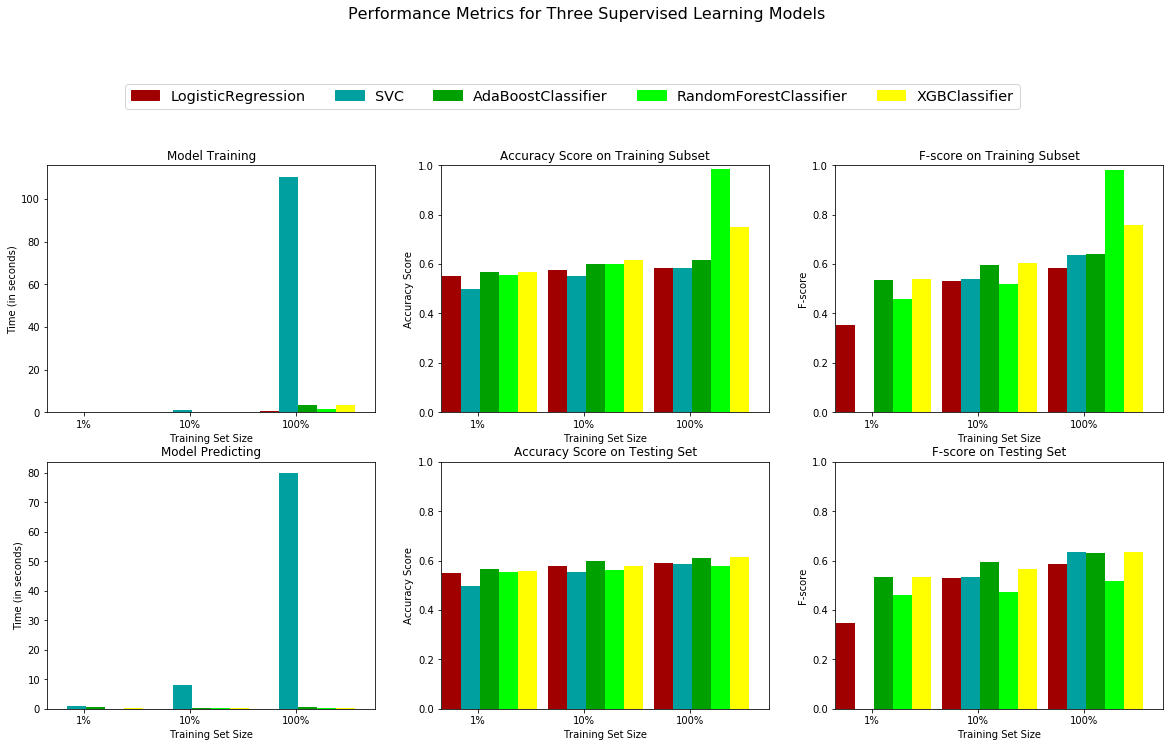

In [238]:
# Run metrics visualization for the five supervised learning models chosen
evaluate(results, accuracy, fscore)

<font size=4><b> Model Tuning </font></b>

We can use 2 methods for hyper-paramter tuning. GridsearchCV or RandomizedsearchCV.

<font size=3><b> GridSearchCV </font></b>
<font size=2>Grid Search can be thought of as an exhaustive search for selecting a model. In Grid Search, we can set up a grid of hyperparameter values and for each combination, trains a model and scores on the testing data. In this approach, every combination of hyperparameter values is tried which can be very inefficient. For example, searching 20 different parameter values for each of 4 parameters will require 160,000 trials of cross-validation. This equates to 1,600,000 model fits and 1,600,000 predictions if 10-fold cross validation is used. While Scikit Learn offers the GridSearchCV function to simplify the process, it would be an extremely costly execution both in computing power and time.</font>

<font size=3><b> RandomsizedSearchCV </font></b>
<font size=2>Random search is a technique where random combinations of the hyperparameters are used to find the best solution for the built model. It tries random combinations of a range of values. To optimise with random search, the function is evaluated at some number of random configurations in the parameter space.</font>

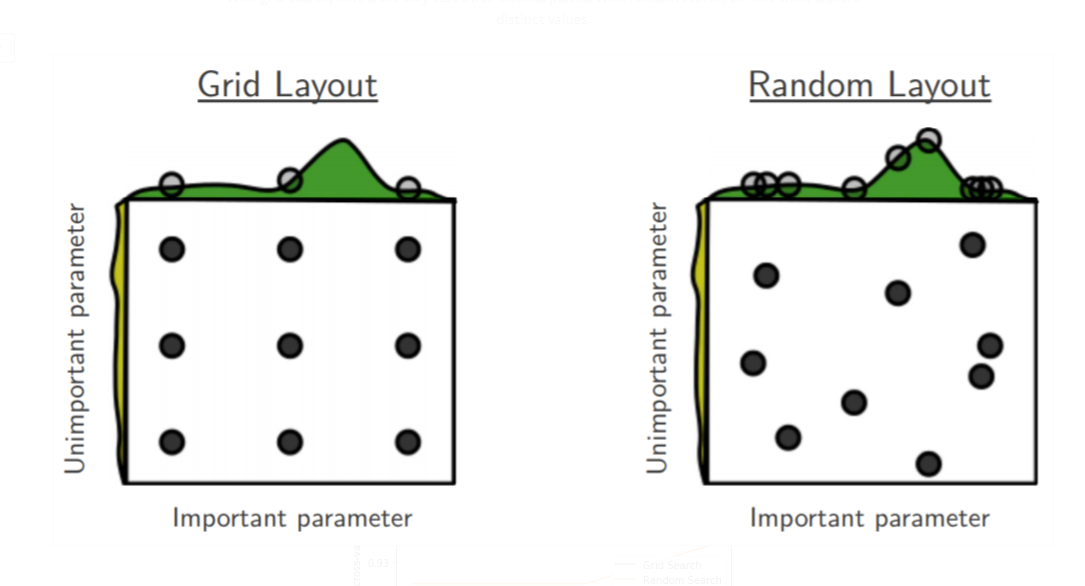

<font size=2>We will use GridsearchCV and RandomisedsearchCV from sklearn.

sklearn.model_selection.GridSearchCV : https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

sklearn.model_selection.RandomizedSearchCV : https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html

Based on the trial run did on both these technicques, i found gridsearchcv takes lot of time to complete. Running gridsearchcv on xgboost took 4 days to run. Whereas randomizedsearchcv took around 20mins. So for this project I will be using RandomizedSearchCV.</font>

In [350]:
# Initialize the classifier
clf = AdaBoostClassifier(random_state=0)

# Create the parameters list you wish to tune, using a dictionary if needed.
# parameters = {'parameter_1': [value1, value2], 'parameter_2': [value1, value2]}

#base_estimator: The model utilized for the weak learners (default is DecisionTreeClassifier(max_depth=1) )
#n_estimators: The maximum number of weak learners used.In case of perfect fit (default is n=50)
#learning_rate is the contribution of each model to the weights and defaults to 1. Reducing the learning rate will mean 
   #the weights will be increased or decreased to a small degree, forcing the model train slower 
   #(but sometimes resulting in better performance scores).

np.random.seed(22)
parameters = {'base_estimator': [DecisionTreeClassifier(max_depth=1), DecisionTreeClassifier(max_depth=2), 
                                 DecisionTreeClassifier(max_depth=3)],
              'learning_rate': [0.18,0.19,0.2,0.25,0.3],
              'n_estimators': [50,55,60,65,70,75,100]
             }


# Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(fbeta_score,beta=2)

# Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = RandomizedSearchCV(clf, parameters, scoring = scorer)

# Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_clf0 = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions0 = best_clf0.predict(X_test)

# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 2)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions0)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions0, beta = 2)))

C:\Users\Ravi\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Unoptimized model
------
Accuracy score on testing data: 0.6094
F-score on testing data: 0.6311

Optimized Model
------
Final accuracy score on the testing data: 0.5954
Final F-score on the testing data: 0.7033


In [241]:
best_clf0

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=1,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
                             

In [343]:

clf = XGBClassifier(objective= 'binary:logistic', random_state=0)

# Create the parameters list you wish to tune, using a dictionary if needed.
# parameters = {'parameter_1': [value1, value2], 'parameter_2': [value1, value2]}

#base_estimator: The model utilized for the weak learners (default is DecisionTreeClassifier(max_depth=1) )
#n_estimators: The maximum number of weak learners used.In case of perfect fit (default is n=50)
#learning_rate is the contribution of each model to the weights and defaults to 1. Reducing the learning rate will mean 
   #the weights will be increased or decreased to a small degree, forcing the model train slower 
   #(but sometimes resulting in better performance scores).

np.random.seed(22)
parameters = {
              'min_child_weight':[4,5,5.5,6,6.5],
              'gamma': [0.2,0.25,0.3],
              'subsample': [0.3,0.35,0.4,0.45],
              'colsample_bytree': [0.85,0.9,0.95],
              'reg_alpha': [0.05,0.1,0.15,0.2,0.25,0.3],
              'reg_lambda': [0.035,0.04, 0.05,0.055,0.06,0.065],
              'learning_rate' : [0.006,0.007,0.008],
              'n_estimators': [25,40, 45, 50, 55, 60, 75]}

# Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(fbeta_score,beta=2)

# Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = RandomizedSearchCV(clf, parameters, scoring=scorer)

# Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 2)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 2)))

C:\Users\Ravi\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Unoptimized model
------
Accuracy score on testing data: 0.6140
F-score on testing data: 0.6328

Optimized Model
------
Final accuracy score on the testing data: 0.6073
Final F-score on the testing data: 0.7125


In [317]:
best_clf

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.95, gamma=0.25, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.006, max_delta_step=0, max_depth=6,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              n_estimators=55, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0.15,
              reg_lambda=0.055, scale_pos_weight=1, subsample=0.35,
              tree_method=None, validate_parameters=False, verbosity=None)

<font size=3><b> Confusion Matrix </font></b>
 
We will use confusion matric from sklearn metrics library
 
sklearn.metrics.confusion_matrix : https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
 
By definition a confusion matrix C is such that C(i,j) is equal to the number of observations known to be in group i and predicted to be in group j.

Thus in binary classification, the count of true negatives is C(0,0) , false negatives is C(1,0) , true positives is C(1,1)  and false positives is C(0,1) .

In [355]:
metrics.confusion_matrix(y_test, best_predictions)

array([[3091, 3637],
       [1677, 5128]], dtype=int64)

<font size=4><b> Final results </font></b>

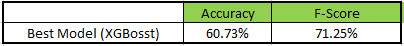




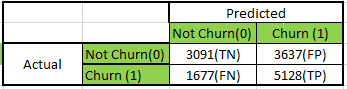